In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read the GA networtk from edge list as Panda's dataframe
ga_edges = pd.read_csv('ga.edge.list.csv')
ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [5]:
# Convert the dataframe to NetworkX graph
GA = nx.from_pandas_dataframe(ga_edges, source="from", target="to")
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


C:\Users\Chen Yanai\Anaconda2\envs\python36\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Chen Yanai\Anaconda2\envs\python36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Chen Yanai\Anaconda2\envs\python36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Chen Yanai\Anaconda2\envs\python36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_l

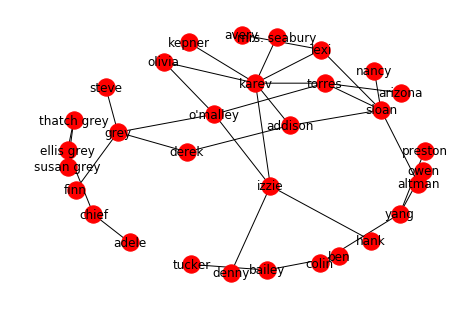

In [6]:
# Draw the graph using Spring layout
nx.draw_spring(GA, with_labels=True)

In [16]:
# Draw the graph using Circular layout
nx.draw_circular(GA, with_labels=True)

NameError: name 'G' is not defined

In [8]:
#Print the conncetions of denny
print("'denny' From Edge List Graph:", GA['denny'])

'denny' From Edge List Graph: {'izzie': {}}


In [9]:
# What is the degree of Meredith?
GA.degree("grey")

4

In [10]:
# And for all the cast..
GA.degree()

{'addison': 3,
 'adele': 1,
 'altman': 2,
 'arizona': 1,
 'avery': 1,
 'bailey': 2,
 'ben': 1,
 'chief': 2,
 'colin': 1,
 'denny': 1,
 'derek': 2,
 'ellis grey': 2,
 'finn': 1,
 'grey': 4,
 'hank': 1,
 'izzie': 4,
 'karev': 7,
 'kepner': 1,
 'lexi': 3,
 'mrs. seabury': 1,
 'nancy': 1,
 "o'malley": 4,
 'olivia': 2,
 'owen': 2,
 'preston': 1,
 'sloan': 5,
 'steve': 1,
 'susan grey': 1,
 'thatch grey': 2,
 'torres': 4,
 'tucker': 1,
 'yang': 3}

In [19]:
# Here's the top 5.
sorted(GA.degree(), key=lambda x:x[1], reverse=True)[:10]

['izzie',
 'owen',
 'avery',
 'susan grey',
 'tucker',
 'steve',
 'arizona',
 'grey',
 'preston',
 'mrs. seabury']

In [12]:
# Degree Centrality (Normalized)

# Degree for the 'Grey' node
degree_grey = GA.degree("grey")  # 4 romantic partners
# Total number of nodes (excluding Grey) 
total_nodes_minus_grey = len(GA.nodes())-1  # 31 characters in the cast, excluding Grey

# Degree centrality for Grey
degree_centrality_grey = (float(degree_grey) / total_nodes_minus_grey)
print("Calculated degree centrality for Grey:", degree_centrality_grey)

# Double check
print("Networkx degree centrality for Grey:", nx.degree_centrality(GA)["grey"])

def check_equal(val1, val2):
    assert (val1 == val2),"Centrality measure calculated incorrectly!"
    return "Values match, good job!"

check_equal(degree_centrality_grey, nx.degree_centrality(GA)["grey"])

Calculated degree centrality for Grey: 0.12903225806451613
Networkx degree centrality for Grey: 0.12903225806451613


'Values match, good job!'

In [13]:
# Degree Centrality (Normalized) for all the nodes
degree_centrality = nx.degree_centrality(GA)
degree_centrality

{'addison': 0.0967741935483871,
 'adele': 0.03225806451612903,
 'altman': 0.06451612903225806,
 'arizona': 0.03225806451612903,
 'avery': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'ben': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'colin': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'ellis grey': 0.06451612903225806,
 'finn': 0.03225806451612903,
 'grey': 0.12903225806451613,
 'hank': 0.03225806451612903,
 'izzie': 0.12903225806451613,
 'karev': 0.22580645161290322,
 'kepner': 0.03225806451612903,
 'lexi': 0.0967741935483871,
 'mrs. seabury': 0.03225806451612903,
 'nancy': 0.03225806451612903,
 "o'malley": 0.12903225806451613,
 'olivia': 0.06451612903225806,
 'owen': 0.06451612903225806,
 'preston': 0.03225806451612903,
 'sloan': 0.16129032258064516,
 'steve': 0.03225806451612903,
 'susan grey': 0.03225806451612903,
 'thatch grey': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'tucker': 0.03225806451612903,
 'yang': 0

In [14]:
# Top 5.  Percent of cast this character has been with.
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('karev', 0.22580645161290322),
 ('sloan', 0.16129032258064516),
 ('torres', 0.12903225806451613),
 ('grey', 0.12903225806451613),
 ('izzie', 0.12903225806451613)]

In [15]:
# attach the degree centrality as node attributes
nx.set_node_attributes(GA, degree_centrality, 'degree centrality')
GA.node['karev']

TypeError: unhashable type: 'dict'

In [ ]:
# compute closeness centrality
closeness_centrality = nx.closeness_centrality(GA)
closeness_centrality

In [ ]:
# Attach closeness centrality
nx.set_node_attributes(GA, closeness_centrality, 'closeness centrality')
closeness_centrality['grey']

In [ ]:
# compute betweeness centrality
betweeness_centrality = nx.betweenness_centrality(GA)
betweeness_centrality

In [ ]:
# Top 5 
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
# compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(GA)
eigenvector_centrality

In [ ]:
# compute eigenvector centrality - normalized

max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])

ec_scaled = {}
for k in eigenvector_centrality.keys():
    ec_scaled[k] = max (eigenvector_centrality[k] / max_value[1],0.0)

# Scaled by the most central character (karev)
sorted(ec_scaled.items(), key=lambda x:x[1], reverse=True)

In [20]:
# Link Prediction - who will the next couple?
# jaccard_coefficient(u,v) = |intersection(N(u), N(v))| / |union(N(u), N(v))|, 
# when N(z) = the immidate neighbors of "z" 

preds_jc = nx.jaccard_coefficient(GA)


pred_jc_dict = {}
for u, v, p in preds_jc:
    pred_jc_dict[(u,v)] = p

sorted(pred_jc_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('steve', 'finn'), 1.0),
 (('preston', 'colin'), 1.0),
 (('tucker', 'ben'), 1.0),
 (('hank', 'denny'), 1.0),
 (('mrs. seabury', 'kepner'), 1.0),
 (('steve', 'derek'), 0.5),
 (('owen', 'colin'), 0.5),
 (('owen', 'preston'), 0.5),
 (('derek', 'finn'), 0.5),
 (('torres', 'olivia'), 0.5)]

In [21]:
# Link Prediction - who will the next couple?
# preferential_attachment(u,v) = deg(u)*deg(v)

preds_pa = nx.preferential_attachment(GA)

pred_pa_dict = {}
for u, v, p in preds_pa:
    pred_pa_dict[(u,v)] = p

sorted(pred_pa_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[(('sloan', 'karev'), 35),
 (('grey', 'karev'), 28),
 (("o'malley", 'karev'), 28),
 (('karev', 'yang'), 21),
 (('sloan', 'grey'), 20),
 (('sloan', "o'malley"), 20),
 (('sloan', 'izzie'), 20),
 (('grey', 'torres'), 16),
 (('grey', 'izzie'), 16),
 (('torres', 'izzie'), 16)]

In [ ]:
# Link Prediction - who will the next couple?
# adamic_adar_index(u,v) = sum(1/log(N(t)),  when t belongs to intersection(N(u), N(v))
# when N(z) = the immidate neighbors of "z" 

preds_aa = nx.adamic_adar_index(GA)

pred_aa_dict = {}
for u, v, p in preds_aa:
    pred_aa_dict[(u,v)] = p

sorted(pred_aa_dict.items(), key=lambda x:x[1], reverse=True)[:10]

In [ ]:
# Find communities - using the girvan_newman (edge betweeness)
# select the first partioning

from networkx.algorithms.community import girvan_newman
gn_comm = girvan_newman(GA)
first_iteration_comm = tuple(sorted(c) for c in next(gn_comm))
dict(enumerate(first_iteration_comm))

In [ ]:
# compute communities - using the girvan_newman (edge betweeness)
# select the first four partionings


from networkx.algorithms.community import girvan_newman
gn_comm = girvan_newman(GA)
for i in range(0,4):
    current = tuple(sorted(c) for c in next(gn_comm))
    print "Partition " + str(i)

    print dict(enumerate(current))

In [23]:
# compute communities - using the girvan_newman (edge betweeness)
# select the first four partionings ans assign the partitions to the nodes as attrbites


from networkx.algorithms.community import girvan_newman
gn_comm = girvan_newman(GA)
for i in range(0,4):
    current = enumerate (tuple(sorted(c) for c in next(gn_comm)))
    membership = dict()
    for commId,members in current:
        for m in members:
            membership[m]=commId
    nx.set_node_attributes(GA, membership, 'partition_'+str(i))

GA.node['grey']

ImportError: cannot import name 'girvan_newman'

In [ ]:
# Export the graph
nx.write_gexf(GA,'GA-update.gexf')